In [ ]:
import pandas as pd   # for reading csv
import numpy as np    # perform mathematical operations
import re   # for regular expression operations
import nltk   # natural language toolkit - work with human language

from sklearn.feature_extraction.text import TfidfVectorizer   # to tokenize raw data
from sklearn.model_selection import train_test_split    # for splitting data

from sklearn.svm import LinearSVC   # LinearSVC model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix   # for calculating accuracy and creating classification_report and confusion_matrix

import matplotlib.pyplot as plt   # to plot figures
import seaborn as sns   # for data visualization

In [ ]:
train_data = pd.read_csv('train.csv')   # read train csv file
train_data    # display train dataset

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
21597,21598,0,i'm so today my small #cousin got his first ...
21598,21599,0,"for #rohingya, fear and forced marriages #traf..."
21599,21600,0,birds &amp; bad #piggies #finger family \ #n...
21600,21601,0,"now that #bfestbuzz is winding down, get for..."


In [ ]:
test_data = pd.read_csv('test.csv')   # read test csv file
test_data   # display test dataset

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


# Converting tweet to lowercase

In [ ]:
def lower(text):
    low_text= text.lower()
    return low_text
train_data['tweet'] = train_data['tweet'].apply(lambda x:lower(x))
test_data['tweet'] = test_data['tweet'].apply(lambda x:lower(x))

# Removing urls and html from tweets

In [ ]:
def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)
train_data['tweet'] = train_data['tweet'].apply(lambda x:remove_urls(x))
test_data['tweet'] = test_data['tweet'].apply(lambda x:remove_urls(x))

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
train_data['tweet'] = train_data['tweet'].apply(lambda x:remove_html(x))
test_data['tweet'] = test_data['tweet'].apply(lambda x:remove_html(x))

# Removing numerical values

In [ ]:
def remove_num(text):
    remove= re.sub(r'\d+', '', text)
    return remove
train_data['tweet'] = train_data['tweet'].apply(lambda x:remove_num(x))
test_data['tweet'] = test_data['tweet'].apply(lambda x:remove_num(x))

# Removing punctuation and stopwords

In [ ]:
from nltk.corpus import stopwords   
nltk.download('stopwords')

STOPWORDS = set(stopwords.words('english'))

def punct_remove(text):
    punct = re.sub(r"[^\w\s\d]","", text)
    return punct
train_data['tweet'] = train_data['tweet'].apply(lambda x:punct_remove(x))
test_data['tweet'] = test_data['tweet'].apply(lambda x:punct_remove(x))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
train_data['tweet'] = train_data['tweet'].apply(lambda x:remove_stopwords(x))
test_data['tweet'] = test_data['tweet'].apply(lambda x:remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Removing @, # and spaces

In [ ]:
def remove_mention(x):
    text=re.sub(r'@\w+','',x)
    return text
train_data['tweet'] = train_data['tweet'].apply(lambda x:remove_mention(x))
test_data['tweet'] = test_data['tweet'].apply(lambda x:remove_mention(x))

def remove_hash(x):
    text=re.sub(r'#\w+','',x)
    return text
train_data['tweet'] = train_data['tweet'].apply(lambda x:remove_hash(x))
test_data['tweet'] = test_data['tweet'].apply(lambda x:remove_hash(x))

def remove_space(text):
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove
train_data['tweet'] = train_data['tweet'].apply(lambda x:remove_space(x))
test_data['tweet'] = test_data['tweet'].apply(lambda x:remove_space(x))

# Preprocessed data

In [ ]:
train_data    # display modified train data

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time urð ðððð ððð
4,5,0,factsguide society motivation
...,...,...,...
21597,21598,0,im today small cousin got first holy communion...
21598,21599,0,rohingya fear forced marriages trafficking hea...
21599,21600,0,birds amp bad piggies finger family nursery rh...
21600,21601,0,bfestbuzz winding get harrypotter relivethemag...


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_data.tweet, train_data.label, test_size=0.30, random_state=42)    # split data into 70% training and 30% testing

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, stop_words='english')    # tokenize using sublinear_tf, frequency of word should be > 5, ignore english stopwords

x_train_tfidf = tfidf.fit_transform(x_train)   
x_test_tfidf = tfidf.transform(x_test)    

# Linear support vector

In [ ]:
lsvc = LinearSVC()    # create LinearSVC model
lsvc.fit(x_train_tfidf, y_train)    # train the model
y_pred = lsvc.predict(x_test_tfidf)   # predict values

print('Accuracy: ', accuracy_score(y_test, y_pred) * 100,'%')   # accuracy

Accuracy:  95.201357815152 %


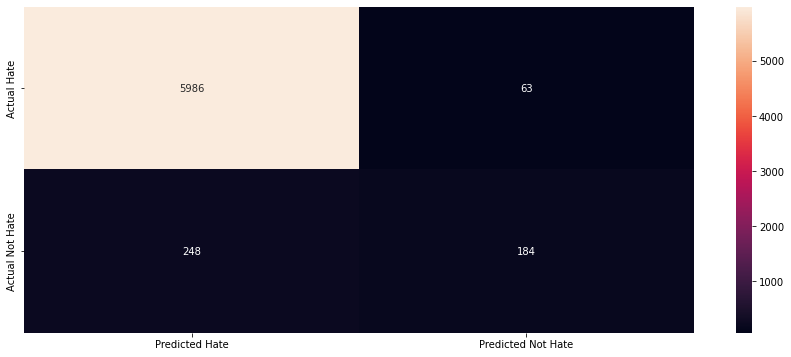

In [ ]:
lsvc_conf = confusion_matrix(y_test, y_pred)    # create confusion matrix
ylabel = ["Actual Hate", "Actual Not Hate"]   # y-axis labels
xlabel = ["Predicted Hate", "Predicted Not Hate"]   # x-axis labels
plt.figure(figsize=(15,6))    
sns.heatmap(lsvc_conf, annot = True, xticklabels = xlabel, yticklabels = ylabel, fmt = 'g')   # display heatmap
plt.show()